# Project Details:
- Gathering the Data
- Assessing the Data
- Cleaning the Data
- Storing, analyzing, and visualizing wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import re
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [11, 11]}, font_scale=1.2)

# Gathering the Data

We gather the data from different Sources:
1. `Twitter Archive` as a given csv file..
2. `Tweet Image Predictions` from a given URL..
3. `Twitter API` but the ids are expired and give errors so i used the given file `(tweet-jason.txt)`.. 

### 1. Twitter Archive

In [2]:
# Twitter archive file is given as a csv file then i created Pandas dataframe from this csv file..
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# check and visualize the df data..
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# check and visualize the df data for data types and missing data..
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
# check and visualize the df data for names and try to define incorrect data..
df_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
JD           1
Pippin       1
Hall         1
Jersey       1
Zeek         1
Name: name, Length: 957, dtype: int64

In [6]:
# Exloration of unique name data because of the incorrect names and be more visualizing to the data..
df_twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### 2- Tweet Image Predictions

In [7]:
#Using the given url to get the image predictions data..
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predictions = pd.read_csv(url, sep='\t')

In [8]:
# check and visualize the df data
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
# check and visualize the df data for data types and missing data..
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3- Twitter API 
As you see, I freeze the cell as it gives a lot of errors and takes a long time so i used `(jason-text.txt)` the given file..

In [10]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

#### `First` I used the given file `(tweet-json.txt)` because the above code of `Tweepy Api` gives errors as the ids are expired..

#### `Second` I read the `(tweet-json.txt)` and selected the required date `('id', 'favorite_count', 'retweet_count')`..

#### `Finally` I created dictionary then convert it to pandas DataFrame..

In [11]:
tweet_data = ['id', 'favorite_count', 'retweet_count']
data_list = []

with open('tweet-json.txt', 'r') as f: 
    tweet_json = f.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data = dict((element, tweet_dict[element]) for element in tweet_data)
        data_list.append(data)
        tweet_json = f.readline()
        
            
    
df_tweet_data = pd.DataFrame.from_dict(data_list)

In [12]:
# rename the id column as required for merging in the next steps..
df_tweet_data.rename(columns = {'id':'tweet_id'}, inplace = True) 

In [13]:
# save the tweets data to txt file.. 
df_tweet_data.to_csv('tweet_json.txt')

In [14]:
# Created a csv file to be more visualising in Excel..
df_tweet_data.to_csv('tweet_json.csv')

In [15]:
# check and visualize the df data..
df_tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [16]:
# check and visualize the df data for data types and missing data..
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Assessing the Data

I will assess the data visually and programmatically to identify:
- Data quality issues
- Tidiness issues

## Visual Assessment:

**By looking through the data in Jupyter Notebook and the Excel**


## Programmatica Assessment:

**By using Methods and Functions to summarize the data like `df.info(),df.sample(), df.describe(), df.column.value_counts()`as i did above and continued below**

In [17]:
# See a sample of the data for more general visualizing..
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2152,669680153564442624,NaN,NaN,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shawwn. He's a Turkish Gangrene Robitu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669680153...,8,10,Shawwn,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
1034,745057283344719872,NaN,NaN,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None


In [18]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True


In [19]:
df_tweet_data.sample(5)

,tweet_id,favorite_count,retweet_count
1922,674075285688614912,1047,316
1586,686730991906516992,4543,1350
1817,676590572941893632,1001,142
1328,705786532653883392,2132,596
272,840728873075638272,0,18285


In [20]:
#Check for unexpected values..
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
#Check for unexpected values..
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# Check the source column for more visualizing..
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Issues to Clean

### `Quality` (Completeness, Validity, Accuracy, and Consistency Issues)

1.  `df_twitter_archive` has 2356 rows while the `df_image_predictions` has only 2075 rows, because of the retweets and the missing images.
2.  `df_twitter_archive` contains 78 replies and 181 retweets that we don't need as mention in the project requirments.
3.  `name` column  has incorrect dogs names such as 'a','an','this','by', 'all' and etc.   
4.  `rating_numerator` column has unexpected rating as it should be in range 10.   
5.  `rating_denominator` column has unexpected rating as it should be in range 10.       
6.  `source` column is not clear and needs modifications.  
7.  `timestamp` column needs to remove +0000.  
8.  `data type` needs to be changed to their most appropriate type.   
9.  `Consistency` by rename the columns and its order to the standard.


### `Tidiness` (Structural Issues)

1.  `3 dataframes`, we should merge them into 1.
2.  `4 columns` for `doggo, floffer, pupper, and puppo` in the `df_twitter_archive` and should be in only 1 column.
3.  `3 predictions` for the dog breed in the `image_predictions` and we should choose the best predictions.

# Cleaning the Data

In [23]:
# Creat a copy of the original 3 DataFrame for cleaning step..
df_archive_clean = df_twitter_archive.copy()
df_image_clean = df_image_predictions.copy()
df_tweet_clean = df_tweet_data.copy() 

In [24]:
# Save a csv copy of the clean DataFrame.. 
df_archive_clean.to_csv('archive_clean.csv',encoding='utf-8',index=False)
df_image_clean.to_csv('image_clean.csv',encoding='utf-8',index=False)
df_tweet_clean.to_csv('tweet_clean.csv',encoding='utf-8',index=False)

In [25]:
# Load the clean DataFrame..
df_archive_clean = pd.read_csv('archive_clean.csv')
df_image_clean = pd.read_csv('image_clean.csv')
df_tweet_clean= pd.read_csv('tweet_clean.csv')

In [26]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
df_tweet_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Define
### 1- Merge the 3 dataframes into 1 master dataframe --> `(Tidiness (Structural Issues))`..

## Code

In [29]:
# Merge the three DataFrames into one DataFrame, starting with archive_clean and tweet_clean..
df_merged_data = pd.merge(df_archive_clean, df_tweet_clean, on=['tweet_id'],how='left') 

In [30]:
# Check.. 
df_merged_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0


In [31]:
# Merge with image_clean to create Master DataFrame..
df_master = pd.merge(df_merged_data, df_image_clean, on='tweet_id',how='left') 

In [32]:
# Increase number of visible columns.. 
pd.set_option("display.max_columns",35)

In [33]:
# Check.. 
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Test 

In [34]:
# Check df_master..
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
# Save a csv copy of df_master..
df_master.to_csv('data_master.csv',encoding='utf-8',index=False)

## Define
### 2-  Remove Replies and Retweets --> `(Quality)`

## Code

In [36]:
# Check the df_master again..
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
# There are 78 replies though We keep the rows that are null and remove the replies..
df_master = df_master[df_master.in_reply_to_status_id.isnull()]

In [38]:
# delete the columns related to replies from df_master..
df_master = df_master.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [39]:
# Check again after deleting..
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

In [40]:
# There are 181 retweets and in 3 columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp"..
# Though, We keep the rows that are null and remove the retweets..
df_master = df_master[df_master.retweeted_status_id.isnull()]

In [41]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   timestamp                   2097 non-null   object 
 2   source                      2097 non-null   object 
 3   text                        2097 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2094 non-null   object 
 8   rating_numerator            2097 non-null   int64  
 9   rating_denominator          2097 non-null   int64  
 10  name                        2097 non-null   object 
 11  doggo                       2097 non-null   object 
 12  floofer                     2097 non-null   object 
 13  pupper                      2097 

In [42]:
# delete the columns related to retweets from df_master..
df_master = df_master.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

## Test

In [43]:
# Check again after deleting..
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  favorite_count      2097 non-null   float64
 13  retweet_count       2097 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

## Define
### 3-  Remove tweets that have missing images --> `(Quality)`
Because as you see the numbers of row aren't matched.

## Code

In [44]:
# Though, we will delete the tweets without an image..
df_master = df_master[df_master.jpg_url.notnull()]

## Test

In [45]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  favorite_count      1971 non-null   float64
 13  retweet_count       1971 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

## Define
### 4-  Remove the incorrect dog names from name column --> `(Quality)`

## Code

In [46]:
# Check the list of dog names.
list(df_master['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

In [47]:
# We see that the incorrect names have a lowercase letter though We will use this to change them into 'None'.. 
names=[]

#function to check if the first letter is lowercase..
def incorrect_names(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
df_master.apply(incorrect_names, axis=1)
df_master['names'] = names
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Franklin


In [48]:
df_master['names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [49]:
# update original name column..
df_master['name'] = df_master['names']

In [50]:
# delete names column..
df_master = df_master.drop('names', axis=1)

## Test

In [51]:
# check name column..
df_master['name'].value_counts()

None        622
Charlie      11
Cooper       10
Oliver       10
Lucy         10
           ... 
Ruffles       1
Harnold       1
Link          1
Stella        1
Philbert      1
Name: name, Length: 913, dtype: int64

## Define
### 5-  Check the values in rating_numerator and denominator --> `(Quality)`

## Code & Test

In [52]:
# Check numerators Values
df_master.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [53]:
# Check denominators Values
df_master.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

### Dogs are rated on `a scale of one to ten`, but are invariably given ratings in excess of the maximum, such as "13/10". 
###### Besides, it is mentioned in project key point :
`"The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs."`

## Define
### 6-  Extract the source type from source column by using regex --> `(Quality)`

## Code

In [54]:
df_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [55]:
df_master['source'] = df_master['source'].apply(lambda x: re.findall(r'<a[^>]*>(.*?)</a>', x)[0])

## Test

In [56]:
# Check..
df_master['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Define
### 7-  Remove +0000 from timestamp column and convert its data type --> `(Quality)`

## Code

In [57]:
df_master.timestamp = df_master.timestamp.str.strip('+0000')

In [58]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)

## Test

In [59]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [60]:
# Check 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   doggo               1971 non-null   object        
 9   floofer             1971 non-null   object        
 10  pupper              1971 non-null   object        
 11  puppo               1971 non-null   object        
 12  favorite_count      1971 non-null   float64       
 13  retweet_count       1971 non-null   float64     

## Define
### 8-  Melt 'doggo', 'floofer', 'pupper', and 'puppo'  into 1 `'dog_stage'` --> `(Tidiness (Structural Issues))`

## Code

In [61]:
df_master['doggo'].value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [62]:
df_master['floofer'].value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [63]:
df_master['pupper'].value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [64]:
df_master['puppo'].value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [65]:
# Create list of columns for for melt function
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [66]:
columns_data=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 
        'retweet_count', 'jpg_url','img_num', 'p1', 'p1_conf', 'p1_dog',
        'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog']
stage_data=['doggo', 'floofer', 'pupper', 'puppo']

In [67]:
# Melt the 4 columns into a'dog_stage'column..
df_master1 = pd.melt(df_master,id_vars = columns_data,value_vars = stage_data,var_name = 'stage', value_name = 'dog_stage')

In [68]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            7884 non-null   int64         
 1   timestamp           7884 non-null   datetime64[ns]
 2   source              7884 non-null   object        
 3   text                7884 non-null   object        
 4   expanded_urls       7884 non-null   object        
 5   rating_numerator    7884 non-null   int64         
 6   rating_denominator  7884 non-null   int64         
 7   name                7884 non-null   object        
 8   favorite_count      7884 non-null   float64       
 9   retweet_count       7884 non-null   float64       
 10  jpg_url             7884 non-null   object        
 11  img_num             7884 non-null   float64       
 12  p1                  7884 non-null   object        
 13  p1_conf             7884 non-null   float64     

In [69]:
df_master1.dog_stage.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [70]:
# Sort df by 'dog_stage' then we drop the 3 duplicates that don't contain a dog stage..
df_master1= df_master1.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

## Test

In [71]:
# Check..
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorite_count      1971 non-null   float64       
 9   retweet_count       1971 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  p1                  1971 non-null   object        
 13  p1_conf             1971 non-null   float64  

In [72]:
df_master1.dog_stage.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

## Define
### 9-  Choose the best predictions from  the dog breed 3 predictions --> `(Tidiness (Structural Issues))`

## Code

In [73]:
breed = []
prediction = []

# function that finds the best prediction which is a breed of dog..
def breed_prediction(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        prediction.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        prediction.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        prediction.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        prediction.append(0)
        

df_master1.apply(breed_prediction, axis=1)
df_master1['breed'] = breed
df_master1['prediction'] = prediction

# check the columns
df_master1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,dog_stage,breed,prediction
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489.0,234.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326.0,89.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483.0,257.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,doggo,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833.0,620.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,doggo,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327.0,96.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,doggo,None,Labrador_retriever,0.825670


In [74]:
# Drop predictions and prediction probability columns
df_master1 = df_master1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

## Test

In [75]:
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorite_count      1971 non-null   float64       
 9   retweet_count       1971 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  stage               1971 non-null   object        
 12  dog_stage           1971 non-null   object        
 13  breed               1971 non-null   object   

In [76]:
df_master1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,stage,dog_stage,breed,prediction
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489.0,234.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326.0,89.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo,None,Rottweiler,0.999091
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483.0,257.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo,None,Unknown,0.000000
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833.0,620.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo,None,Unknown,0.000000
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327.0,96.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo,None,Labrador_retriever,0.825670


## Define
### 10-  Convert each column to its most appropriate data type --> `(Quality)`

## Code

In [77]:
# Convert data types to most suitable data type and round prediction to 2 decimal..
df_master1['tweet_id'] = df_master1['tweet_id'].astype(object)
df_master1['source'] = df_master1['source'].astype('category')
df_master1['favorite_count'] = df_master1['favorite_count'].astype(int)
df_master1['retweet_count'] = df_master1['retweet_count'].astype(int)
df_master1['dog_stage'] = df_master1['dog_stage'].astype('category')
df_master1['prediction'] = df_master1['prediction'].round(2)

## Test

In [78]:
df_master1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,stage,dog_stage,breed,prediction
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo,None,Saint_Bernard,0.38
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo,None,Rottweiler,1.00
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo,None,Unknown,0.00
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo,None,Unknown,0.00
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo,None,Labrador_retriever,0.83


In [79]:
# Check..
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   category      
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorite_count      1971 non-null   int32         
 9   retweet_count       1971 non-null   int32         
 10  jpg_url             1971 non-null   object        
 11  stage               1971 non-null   object        
 12  dog_stage           1971 non-null   category      
 13  breed               1971 non-null   object   

## Define
### 11-  Rename and reorder columns in a logical manner --> `(Quality)`

## Code

In [80]:
df_master1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,stage,dog_stage,breed,prediction
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,489,234,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,doggo,None,Saint_Bernard,0.38
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,326,89,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,doggo,None,Rottweiler,1.00
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,483,257,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,doggo,None,Unknown,0.00
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,833,620,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,doggo,None,Unknown,0.00
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,327,96,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,doggo,None,Labrador_retriever,0.83


In [81]:
# Rename columns..
df_master1 = df_master1.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorite_count':'no_of_likes',
                           'jpg_url': 'image_url',
                           'breed': 'dog_breed',
                           'prediction': 'probability'})

In [82]:
# Reorder the columns..
df_master1 = df_master1[['tweet_id','tweet_date','tweet_source','tweet_text','dog_name',
           'dog_score','out_of','dog_stage','dog_breed','probability',
          'no_of_likes','retweet_count','tweet_url','image_url']]

## Test

In [83]:
df_master1.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_url
1895,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.38,489,234,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1894,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,326,89,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
1893,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.00,483,257,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
1892,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.00,833,620,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
1891,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.83,327,96,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


In [84]:
# Save a csv copy of the df_master1..
df_master1.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [85]:
# Load the Clean df..
df_master_clean = pd.read_csv('twitter_archive_master.csv')

In [86]:
# Check..
df_master_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_url
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.38,489,234,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,326,89,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.00,483,257,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.00,833,620,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.83,327,96,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


# Analyzing the Data

In [87]:
# Check the df_master_clean..
df_master_clean

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_url
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,Biden,7,10,None,Saint_Bernard,0.38,489,234,https://twitter.com/dog_rates/status/667405339...,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,326,89,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup....,None,10,10,None,Unknown,0.00,483,257,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,None,6,10,None,Unknown,0.00,833,620,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.83,327,96,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,859607811541651456,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home...,None,13,10,puppo,golden_retriever,0.90,19476,1704,https://twitter.com/dog_rates/status/859607811...,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg
1967,790946055508652032,2016-10-25 16:00:09,Twitter for iPhone,This is Betty. She's assisting with the dishes...,Betty,12,10,puppo,golden_retriever,0.25,18601,5496,https://twitter.com/dog_rates/status/790946055...,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg
1968,756275833623502848,2016-07-21 23:53:04,Twitter for iPhone,When ur older siblings get to play in the deep...,None,10,10,puppo,Airedale,0.60,7114,1738,https://twitter.com/dog_rates/status/756275833...,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg
1969,780931614150983680,2016-09-28 00:46:20,Twitter for iPhone,I want to finally rate this iconic puppo who t...,None,13,10,puppo,Unknown,0.00,24192,8536,https://twitter.com/dog_rates/status/780931614...,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg


In [88]:
# Quick analysis of some of the numbers..
df_master_clean.describe()

,tweet_id,dog_score,out_of,probability,no_of_likes,retweet_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.360418e+17,12.223237,10.477423,0.466301,8949.106545,2784.449518
std,6.752810e+16,41.634034,6.853275,0.339697,12267.799790,4697.662893
min,6.660209e+17,0.000000,2.000000,0.000000,81.000000,16.000000
25%,6.758656e+17,10.000000,10.000000,0.140000,1997.000000,628.500000
50%,7.088343e+17,11.000000,10.000000,0.460000,4147.000000,1367.000000
75%,7.880951e+17,12.000000,10.000000,0.780000,11402.500000,3239.000000
max,8.924206e+17,1776.000000,170.000000,1.000000,132810.000000,79515.000000


## The Questions that we could answer from analysing this DataFrame:
1. What is the most users tweet source type??
2. What is the Top tweeted breeds??
3. What is the Top rated breeds??
4. What is the Top liked breeds??

In [89]:
# Check the number of unique values and its count in tweet_source..
df_master_clean.tweet_source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: tweet_source, dtype: int64

In [90]:
# Check the df again..
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1971 non-null   int64  
 1   tweet_date     1971 non-null   object 
 2   tweet_source   1971 non-null   object 
 3   tweet_text     1971 non-null   object 
 4   dog_name       1971 non-null   object 
 5   dog_score      1971 non-null   int64  
 6   out_of         1971 non-null   int64  
 7   dog_stage      1971 non-null   object 
 8   dog_breed      1971 non-null   object 
 9   probability    1971 non-null   float64
 10  no_of_likes    1971 non-null   int64  
 11  retweet_count  1971 non-null   int64  
 12  tweet_url      1971 non-null   object 
 13  image_url      1971 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 215.7+ KB


## 1. What is the most users tweet source type??

In [91]:
# Group the df by tweet_source count..
df_master_clean.groupby('tweet_source').count()

,tweet_id,tweet_date,tweet_text,dog_name,dog_score,out_of,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_url
tweet_source,,,,,,,,,,,,,
TweetDeck,11,11,11,11,11,11,11,11,11,11,11,11,11
Twitter Web Client,28,28,28,28,28,28,28,28,28,28,28,28,28
Twitter for iPhone,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932


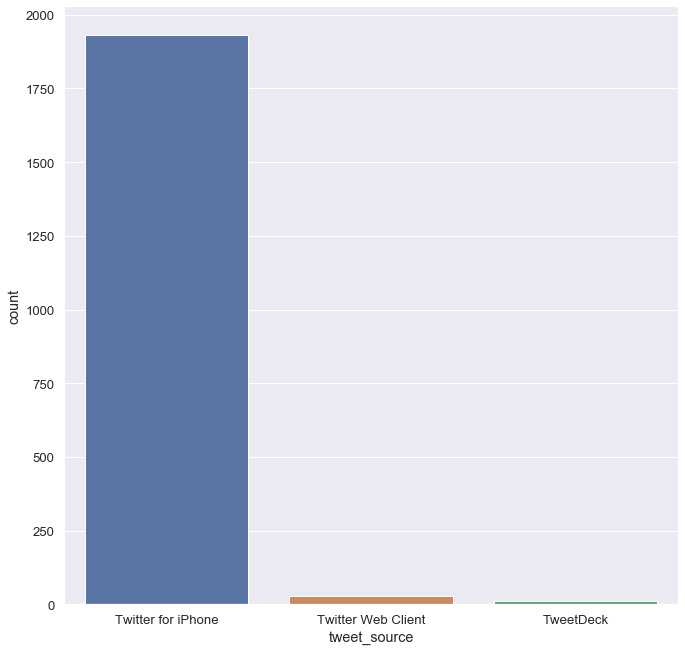

In [92]:
# Plot the count plot to visualize the most tweet_source..
sns.countplot(x="tweet_source", data=df_master_clean)

#### The most used Source is `Twitter for iPhone` which is an indicator that iphone users are big fans for `WeRateDogs Account`..

## 2. What is the Top tweeted breeds??

In [93]:
# Check the number of unique values and its count in dog_breed..
df_master_clean.dog_breed.value_counts()

Unknown                 305
golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
                       ... 
clumber                   1
silky_terrier             1
Japanese_spaniel          1
Bouvier_des_Flandres      1
Irish_wolfhound           1
Name: dog_breed, Length: 114, dtype: int64

In [94]:
# Check the df again..
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1971 non-null   int64  
 1   tweet_date     1971 non-null   object 
 2   tweet_source   1971 non-null   object 
 3   tweet_text     1971 non-null   object 
 4   dog_name       1971 non-null   object 
 5   dog_score      1971 non-null   int64  
 6   out_of         1971 non-null   int64  
 7   dog_stage      1971 non-null   object 
 8   dog_breed      1971 non-null   object 
 9   probability    1971 non-null   float64
 10  no_of_likes    1971 non-null   int64  
 11  retweet_count  1971 non-null   int64  
 12  tweet_url      1971 non-null   object 
 13  image_url      1971 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 215.7+ KB


In [95]:
# df_master_clean['tweet_source'] = df_master_clean['tweet_source'].astype('category')
# df_master_clean['dog_stage'] = df_master_clean['dog_stage'].astype('category')

In [96]:
# see the top dog_breed and its number of tweets..
df_master_clean.dog_breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: dog_breed, dtype: int64

In [97]:
# There were 305 Unknown tweets. Though i will remove them for better visualization..
df_master_clean.loc[df_master_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

In [98]:
# Check again after removing the Unknown values..
df_master_clean.dog_breed.value_counts()

golden_retriever        156
Labrador_retriever      106
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
clumber                   1
silky_terrier             1
Japanese_spaniel          1
Bouvier_des_Flandres      1
Irish_wolfhound           1
Name: dog_breed, Length: 113, dtype: int64

In [99]:
# Select the Top 10..
df_master_clean.dog_breed.value_counts().nlargest(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

In [100]:
# Group the df by dog_breed count..
df_master_clean.groupby('dog_breed').count()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,probability,no_of_likes,retweet_count,tweet_url,image_url
dog_breed,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,50,50,50,50
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13


In [101]:
# See the top ten dog_breed in tweets..
df_master_clean.groupby('dog_breed').count()['dog_name'].nlargest(10)

dog_breed
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: dog_name, dtype: int64

Text(0.5, 1.0, 'Top 10 Breeds Dog Tweeted on WeRateDogs account')

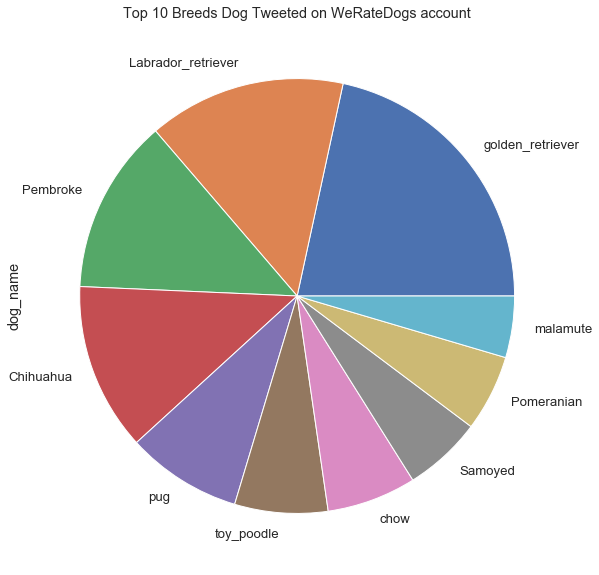

In [102]:
# Plot a horizontal bar chart to show top 15 breeds..
fig = plt.figure(figsize=(12,10))
Top_ten_breed= df_master_clean.groupby('dog_breed').count()['dog_name'].nlargest(10)
Top_ten_breed.plot(kind='pie')
plt.title("Top 10 Breeds Dog Tweeted on WeRateDogs account")

#### We See from Pie Chart that Golden Retriever is the Top one and `Golden Retriever`, `Labrador Retriever`, `Pembroke` and `Chihuahua` are the Top 4

## 3. What is the Top rated breeds??

In [103]:
# Check the number of unique values and its count in dog_score..
df_master_clean.dog_score.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: dog_score, dtype: int64

In [104]:
# By looking at the ratings for each of the breeds, we found that there are a lot of outliers more than 14..
# Though i will take scores only from 0 to 14 for better visualiztion..
df_clean1 = df_master_clean[df_master_clean['dog_score'] <= 14] 

In [105]:
# Check the new df!..
df_clean1.dog_score.value_counts()

12    446
10    417
11    392
13    253
9     150
8      95
7      52
14     33
5      33
6      32
3      19
4      16
2       9
1       5
0       1
Name: dog_score, dtype: int64

In [106]:
# Quick analysis of some of the numbers..
df_clean1.describe()

,tweet_id,dog_score,out_of,probability,no_of_likes,retweet_count
count,1.953000e+03,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,7.361298e+17,10.527394,10.002048,0.465678,8980.264209,2792.152586
std,6.768887e+16,2.189859,0.291611,0.339568,12312.418235,4715.986580
min,6.660209e+17,0.000000,2.000000,0.000000,81.000000,16.000000
25%,6.758209e+17,10.000000,10.000000,0.140000,1957.000000,624.000000
50%,7.087381e+17,11.000000,10.000000,0.460000,4147.000000,1366.000000
75%,7.884121e+17,12.000000,10.000000,0.780000,11452.000000,3244.000000
max,8.924206e+17,14.000000,20.000000,1.000000,132810.000000,79515.000000


In [107]:
# See the top scores for the top 20 breeds. 
df_clean1.groupby('dog_breed').mean()['dog_score'].nlargest(20)

dog_breed
Bouvier_des_Flandres          13.000000
Saluki                        12.500000
briard                        12.333333
Tibetan_mastiff               12.250000
Border_terrier                12.142857
silky_terrier                 12.000000
standard_schnauzer            12.000000
Gordon_setter                 11.750000
Irish_setter                  11.750000
Samoyed                       11.690476
golden_retriever              11.538961
Australian_terrier            11.500000
wire-haired_fox_terrier       11.500000
Great_Pyrenees                11.428571
Pembroke                      11.425532
Eskimo_dog                    11.409091
chow                          11.404255
Doberman                      11.333333
Greater_Swiss_Mountain_dog    11.333333
Irish_water_spaniel           11.333333
Name: dog_score, dtype: float64

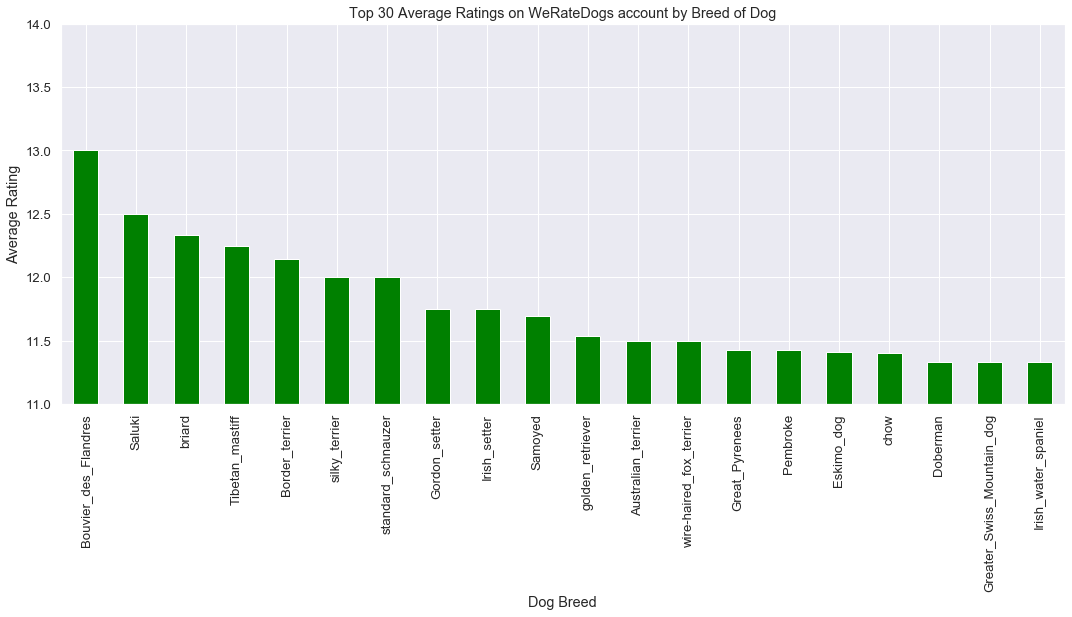

In [108]:
# plot the top scores for the top 20 breeds..
fig = plt.figure(figsize=(18,7))
Top_20_breed= df_clean1.groupby('dog_breed').mean()['dog_score'].nlargest(20)
Top_20_breed.plot(kind='bar',color='green')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog")
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(11,14);

#### So the top breeds are Bouvier des Flandres, Saluki, Briard and Tibetan Mastiff. 
#### But the top breeds with high tweets are `Golden Retriever`, `Labrador Retriever`, `Pembroke` and `Chihuahua`!!!
### Though Let's Check the Data Again... 

In [109]:
# Check dog_breed values again!..
df_clean1['dog_breed'].value_counts()

golden_retriever        154
Labrador_retriever      103
Pembroke                 94
Chihuahua                90
pug                      62
                       ... 
Irish_wolfhound           1
Japanese_spaniel          1
Scotch_terrier            1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 112, dtype: int64

In [110]:
# See the last 60 observation..
df_clean1['dog_breed'].value_counts().tail(60)

basenji                        9
Doberman                       9
borzoi                         9
English_setter                 8
German_short-haired_pointer    8
miniature_poodle               8
flat-coated_retriever          8
Brittany_spaniel               8
Dandie_Dinmont                 7
Newfoundland                   7
Saint_Bernard                  7
papillon                       7
Border_terrier                 7
bloodhound                     7
Mexican_hairless               7
redbone                        6
Irish_terrier                  6
Bedlington_terrier             6
Norfolk_terrier                6
bull_mastiff                   5
Norwich_terrier                5
Walker_hound                   5
miniature_schnauzer            5
Lhasa                          5
Ibizan_hound                   4
Welsh_springer_spaniel         4
Saluki                         4
Rhodesian_ridgeback            4
Irish_setter                   4
Scottish_deerhound             4
Tibetan_ma

In [111]:
# See the Top 30 observation..
df_clean1['dog_breed'].value_counts().head(30)

golden_retriever                  154
Labrador_retriever                103
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     19
Maltese_dog                        19
Shetland_sheepdog                  18
Rottweiler                         18
Lakeland_terrier                   17
basset                             17
Italian_grey

In [112]:
# Define the count of dog_breed..
count = df_clean1['dog_breed'].value_counts()
count.head(30)

golden_retriever                  154
Labrador_retriever                103
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     19
Maltese_dog                        19
Shetland_sheepdog                  18
Rottweiler                         18
Lakeland_terrier                   17
basset                             17
Italian_grey

In [113]:
# Create a new df has dog breeds with at least 15 ratings..
df_clean2 = df_clean1[df_clean1['dog_breed'].isin(count[count > 14].index)]

In [114]:
# Check the new df dog_breed values..
df_clean2.dog_breed.value_counts()

golden_retriever                  154
Labrador_retriever                103
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             20
Maltese_dog                        19
Siberian_husky                     19
Rottweiler                         18
Shetland_sheepdog                  18
Lakeland_terrier                   17
Italian_greyhound                  17
basset      

In [115]:
# Check the new df dog_score values..
df_clean2.dog_score.value_counts()

12    307
11    250
10    235
13    164
9      78
8      38
7      19
14     15
6       6
5       6
4       3
3       2
2       2
1       1
0       1
Name: dog_score, dtype: int64

In [116]:
# Group the df by dog_breed and see the top 20..
df_clean2.groupby('dog_breed').mean()['dog_score'].nlargest(20)

dog_breed
Samoyed                      11.690476
golden_retriever             11.538961
Pembroke                     11.425532
Eskimo_dog                   11.409091
chow                         11.404255
cocker_spaniel               11.333333
Siberian_husky               11.315789
Labrador_retriever           11.203883
French_bulldog               11.193548
Cardigan                     11.142857
German_shepherd              11.000000
Rottweiler                   11.000000
toy_poodle                   11.000000
Pomeranian                   10.975000
malamute                     10.878788
Chesapeake_Bay_retriever     10.838710
Staffordshire_bullterrier    10.750000
basset                       10.705882
kuvasz                       10.625000
Chihuahua                    10.500000
Name: dog_score, dtype: float64

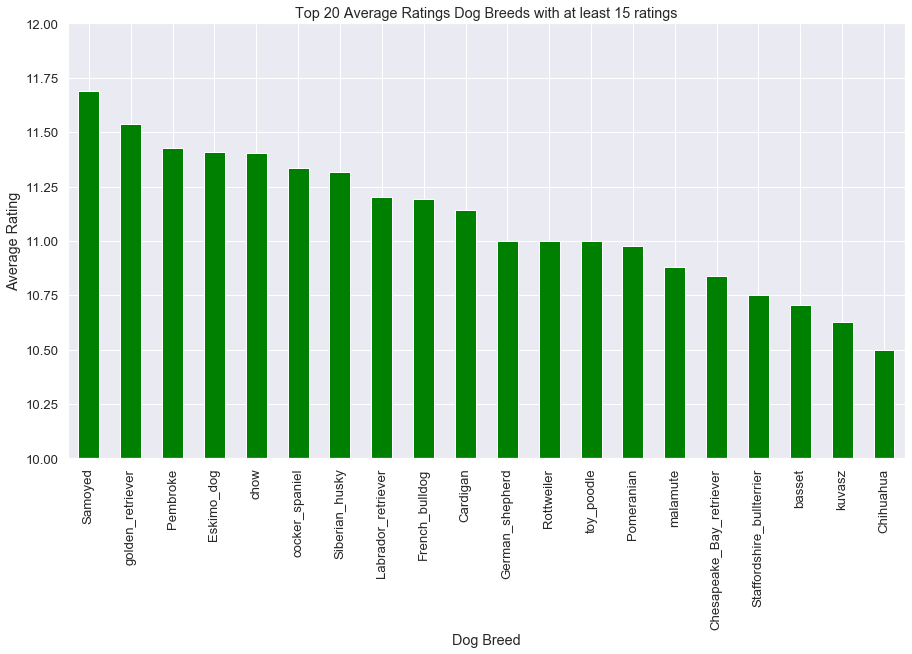

In [117]:
# plot again the top scores for the top 20 breeds..
fig = plt.figure(figsize=(15,8))
Top_20= df_clean2.groupby('dog_breed').mean()['dog_score'].nlargest(20)
Top_20.plot(kind='bar',color='green')
plt.title("Top 20 Average Ratings Dog Breeds with at least 15 ratings")
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

#### Though Now, as you see our top rated breeds are `Samoyed`, `Golden Retriever`, `Great Pyrenees` and `Pembroke`..  

##### The `Golden Retriver` and `Pembroke` appear here so it is great....

## 4. What is the Top liked breeds??

In [118]:
# Check the df..
df_clean2.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,dog_breed,probability,no_of_likes,retweet_count,tweet_url,image_url
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,326,89,https://twitter.com/dog_rates/status/667435689...,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,Cupcake,11,10,None,Labrador_retriever,0.83,327,96,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,None,11,10,None,toy_poodle,0.30,273,102,https://twitter.com/dog_rates/status/667470559...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,Philippe,9,10,None,Chihuahua,0.14,565,294,https://twitter.com/dog_rates/status/667495797...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
9,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,Hall,11,10,None,Labrador_retriever,1.00,563,231,https://twitter.com/dog_rates/status/667502640...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg


In [119]:
# Quick analysis of some of the numbers..
df_clean2.describe()

,tweet_id,dog_score,out_of,probability,no_of_likes,retweet_count
count,1.127000e+03,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,7.414828e+17,10.961846,9.994676,0.575918,9965.275954,3064.320319
std,6.900935e+16,1.715399,0.242046,0.301217,13409.803591,5174.923127
min,6.660334e+17,0.000000,2.000000,0.000000,111.000000,41.000000
25%,6.776049e+17,10.000000,10.000000,0.330000,2253.500000,679.000000
50%,7.175377e+17,11.000000,10.000000,0.600000,4740.000000,1560.000000
75%,7.941473e+17,12.000000,10.000000,0.840000,12576.500000,3528.000000
max,8.921774e+17,14.000000,11.000000,1.000000,132810.000000,79515.000000


In [120]:
# Get the sum of likes..
df_clean2['no_of_likes'].sum()

11230866

In [121]:
# Group the df by dog_breed and get the sum..
df_clean2.groupby('dog_breed').sum()

,tweet_id,dog_score,out_of,probability,no_of_likes,retweet_count
dog_breed,,,,,,
American_Staffordshire_terrier,1.215565e+19,165.0,160.0,8.44,150083.0,36973.0
Cardigan,1.617056e+19,234.0,210.0,10.19,269644.0,79765.0
Chesapeake_Bay_retriever,2.302329e+19,336.0,310.0,13.32,302246.0,81730.0
Chihuahua,6.487619e+19,945.0,901.0,46.91,743689.0,250722.0
Eskimo_dog,1.644455e+19,251.0,220.0,8.35,235104.0,93183.0
French_bulldog,2.430819e+19,347.0,310.0,20.54,570921.0,156230.0
German_shepherd,1.616855e+19,231.0,210.0,14.60,217469.0,56205.0
Italian_greyhound,1.225203e+19,170.0,170.0,7.11,131108.0,35117.0
Labrador_retriever,7.740786e+19,1154.0,1030.0,60.46,1253364.0,399853.0


In [122]:
# Group the df by dog_breed and get the sum of likes..
df_clean2.groupby('dog_breed').sum()['no_of_likes'] 

dog_breed
American_Staffordshire_terrier     150083.0
Cardigan                           269644.0
Chesapeake_Bay_retriever           302246.0
Chihuahua                          743689.0
Eskimo_dog                         235104.0
French_bulldog                     570921.0
German_shepherd                    217469.0
Italian_greyhound                  131108.0
Labrador_retriever                1253364.0
Lakeland_terrier                   203194.0
Maltese_dog                         56234.0
Pembroke                          1038797.0
Pomeranian                         291008.0
Rottweiler                         133174.0
Samoyed                            583906.0
Shetland_sheepdog                  154553.0
Shih-Tzu                            71867.0
Siberian_husky                     137408.0
Staffordshire_bullterrier          189770.0
West_Highland_white_terrier         83358.0
basset                             199955.0
beagle                              88159.0
chow                  

In [123]:
# See the counts of dog_breed..
df_clean2.groupby('dog_breed').count()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_stage,probability,no_of_likes,retweet_count,tweet_url,image_url
dog_breed,,,,,,,,,,,,,
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16
Cardigan,21,21,21,21,21,21,21,21,21,21,21,21,21
Chesapeake_Bay_retriever,31,31,31,31,31,31,31,31,31,31,31,31,31
Chihuahua,90,90,90,90,90,90,90,90,90,90,90,90,90
Eskimo_dog,22,22,22,22,22,22,22,22,22,22,22,22,22
French_bulldog,31,31,31,31,31,31,31,31,31,31,31,31,31
German_shepherd,21,21,21,21,21,21,21,21,21,21,21,21,21
Italian_greyhound,17,17,17,17,17,17,17,17,17,17,17,17,17
Labrador_retriever,103,103,103,103,103,103,103,103,103,103,103,103,103


In [124]:
# See the count of dog_breed with likes..
df_clean2.groupby('dog_breed').count()['no_of_likes']

dog_breed
American_Staffordshire_terrier     16
Cardigan                           21
Chesapeake_Bay_retriever           31
Chihuahua                          90
Eskimo_dog                         22
French_bulldog                     31
German_shepherd                    21
Italian_greyhound                  17
Labrador_retriever                103
Lakeland_terrier                   17
Maltese_dog                        19
Pembroke                           94
Pomeranian                         40
Rottweiler                         18
Samoyed                            42
Shetland_sheepdog                  18
Shih-Tzu                           20
Siberian_husky                     19
Staffordshire_bullterrier          20
West_Highland_white_terrier        15
basset                             17
beagle                             20
chow                               47
cocker_spaniel                     30
golden_retriever                  154
kuvasz                             16
ma

In [125]:
# The Average number of likes per tweet as it will be the sum divided by the number of tweets for each breed..
df_clean3 = round(df_clean2.groupby('dog_breed').sum()['no_of_likes'] / df_clean2.groupby('dog_breed').count()['no_of_likes'],0)

In [126]:
# check the top 20 in the new df..
df_clean3.nlargest(20)

dog_breed
French_bulldog                    18417.0
Samoyed                           13903.0
cocker_spaniel                    13580.0
Cardigan                          12840.0
golden_retriever                  12564.0
Labrador_retriever                12169.0
Lakeland_terrier                  11953.0
basset                            11762.0
Pembroke                          11051.0
Eskimo_dog                        10687.0
German_shepherd                   10356.0
malamute                          10087.0
Chesapeake_Bay_retriever           9750.0
Staffordshire_bullterrier          9488.0
chow                               9439.0
American_Staffordshire_terrier     9380.0
Shetland_sheepdog                  8586.0
miniature_pinscher                 8295.0
Chihuahua                          8263.0
Italian_greyhound                  7712.0
Name: no_of_likes, dtype: float64

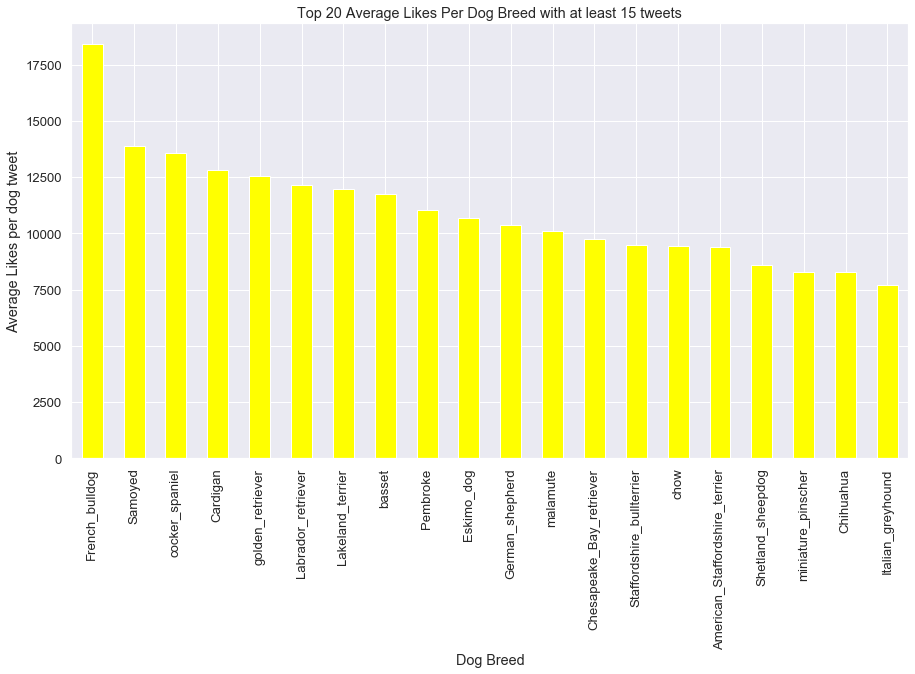

In [127]:
# plot the average most likes for the top 20 breeds..
fig = plt.figure(figsize=(15,8))
df_clean3.nlargest(20).plot(kind='bar',color='Yellow')
plt.title("Top 20 Average Likes Per Dog Breed with at least 15 tweets")
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

- So the French bulldog is the dog most liked one. 
### Conclusion: The Top Ten breeds for all charts are nearly the same with different order.. 
